# Table of Content
<a id="tabel-of-contents"></a>
- [1 Introduction](#1)
    - Notebook Introduction
    - Data Introduction
- [2 Preparations](#2)
- [3 Datasets Overview](#3)
    - [3.1 Quick View](#3.1)
    - [3.2 Basic Statistics](#3.2)
- [4 Visulaztion](#4)
    - [4.1 Histogram](#4.1)
    - [4.2 KDE Plot](#4.2)
    - [4.3 Barplot](#4.3)
    - [4.4 Advanced Visualization](#4.4) (Update 10/9/21)
- [5 Conclusion](#5)

<a id='1'></a>
# 1 Introduction
## 1.1 Notebook Introduction
- This Notebook used <a href=https://www.kaggle.com/dwin183287/tps-september-2021-eda>Sharlto Cope's EDA Notebook</a> as a reference, which is a magnificient Notebook about EDA, my goal is to learn visualizing data like in his Notebook.

- This data is downloaded from <a href=https://www.kaggle.com/kylekohnen/complete-pokemon-data-set>Kyle Cohnen's Complete Pokemon Dataset on Kaggle</a>

## 1.2 Data Introduction
- This Pokemon data set contains 1118 different Pokemon. Most of the data was pulled from `PokeAPI`. Other data sources include `PokemonDB`, `Serebii`, `Bulbapedia`, and `Pokemon Wiki`.
- Pokemon with special forms (e.g. Mega Evolutions, G-Max, etc.) have their own data entry for the special forms.

<a id='2'></a>
# 2 Preparations

- Preparing packages and data that will be used in the analysis process. Packages that will be loaded are maily for data manipulation and data visualization.
- There are only 1 dataset is used here (since this is just for Data Visualization, not Modeling).

In [1]:
# import packages
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

# import dataset
pokemon_data = pd.read_csv('./datasets/pokemon.csv', index_col='name')

<a id='3'></a>
# Dataset Overview
The intend of the overview is to get a feel of the data and its struture (in train, test file, but in our case, we have only one file). An overview on our dataset will include a quick analysis on missing values and basic statistics.

**Observations**
- There are `48` columns, each of them contains an attribute of a Pokemon with `1` column of **`name`** is used as `index`.
- Our Dataset contains 1118 Pokemons with `568` missing values, all in the `evolves_from` attribute. This is normal because Pokemon level 1 aren't evolve from any other Pokemon, we don't have to worry much about this.

<a id='3.1'></a>
## 3.1 Quick View
Below is the first 5 row of our dataset:

In [2]:
pokemon_data.head()

,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,69,Seed Pokémon,1,0.125000,False,False,False,False,True,False,64,45,Monster~Grass,20.000000,70,True,NaN,Green,Quadruped,15.000000,1.000000,2.000000,0.500000,0.500000,0.250000,2.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,130,Seed Pokémon,1,0.125000,False,False,False,False,True,False,142,45,Monster~Grass,20.000000,70,True,Bulbasaur,Green,Quadruped,15.000000,1.000000,2.000000,0.500000,0.500000,0.250000,2.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125000,False,False,False,False,True,True,236,45,Monster~Grass,20.000000,70,False,Ivysaur,Green,Quadruped,15.000000,1.000000,2.000000,0.500000,0.500000,0.250000,2.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,240,10000,Seed Pokémon,1,0.125000,False,False,False,False,False,True,236,45,Monster~Grass,20.000000,70,False,Ivysaur,Green,Quadruped,15.000000,1.000000,2.000000,0.500000,0.500000,0.250000,2.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,24,1555,Seed Pokémon,1,0.125000,False,False,False,False,False,True,281,45,Monster~Grass,20.000000,70,False,Ivysaur,Green,Quadruped,15.000000,1.000000,2.000000,0.500000,0.500000,0.250000,2.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000


In [3]:
print('Number of rows:    {}\nNumber of columns: {}'.format(pokemon_data.shape[0], pokemon_data.shape[1]))

Number of rows:    1118
Number of columns: 48


<a id='3.2'></a>
## 3.2 Basic Statistics
Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile`, and `maximum`.

In [4]:
pokemon_data.describe()

,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,height,weight,gen_introduced,female_rate,base_experience,capture_rate,egg_cycles,base_happiness,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,446.923077,70.025939,80.678891,74.756708,73.231664,72.572451,69.479428,21.427549,993.305009,4.129696,0.382603,157.024150,92.733453,31.046512,62.567084,22.432021,0.863819,1.133050,1.068649,1.051208,1.003131,1.209302,1.071556,0.951029,1.141324,1.154964,0.980098,0.989267,1.244633,1.024150,0.971377,1.067755,0.995081,1.092129
std,270.915589,26.646333,32.056040,30.954899,32.454237,27.782111,30.036549,58.158211,2067.911505,2.337694,0.247861,78.842887,75.681177,30.015299,21.483321,22.900554,0.288862,0.691761,0.608279,0.635425,0.737771,0.759098,0.749530,0.541068,0.786124,0.592281,0.497864,0.605663,0.701525,0.566403,0.380929,0.465632,0.519945,0.540864
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,1.000000,1.000000,0.000000,36.000000,3.000000,5.000000,0.000000,1.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,207.250000,50.000000,55.000000,50.250000,50.000000,50.000000,45.000000,5.000000,88.000000,2.000000,0.125000,70.000000,45.000000,20.000000,70.000000,5.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,446.500000,68.000000,78.500000,70.000000,65.000000,70.000000,67.000000,10.000000,302.500000,4.000000,0.500000,162.000000,60.000000,20.000000,70.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,694.750000,80.750000,100.000000,90.000000,95.000000,90.000000,90.000000,16.000000,800.000000,6.000000,0.500000,207.000000,127.000000,25.000000,70.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,898.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,1000.000000,10000.000000,8.000000,1.000000,608.000000,255.000000,120.000000,140.000000,72.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


<a id='4'></a>
# 4 Visualization
This is where the fun begin! Let's visualize some useful plots!

<a id='4.1'></a>
## 4.1 Histogram
Using histogram to plot our Distribution of 4 Attributes: `HP`, `Attack`, `Defense` and `Speed`.

C:\Users\GT\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Pokemon')

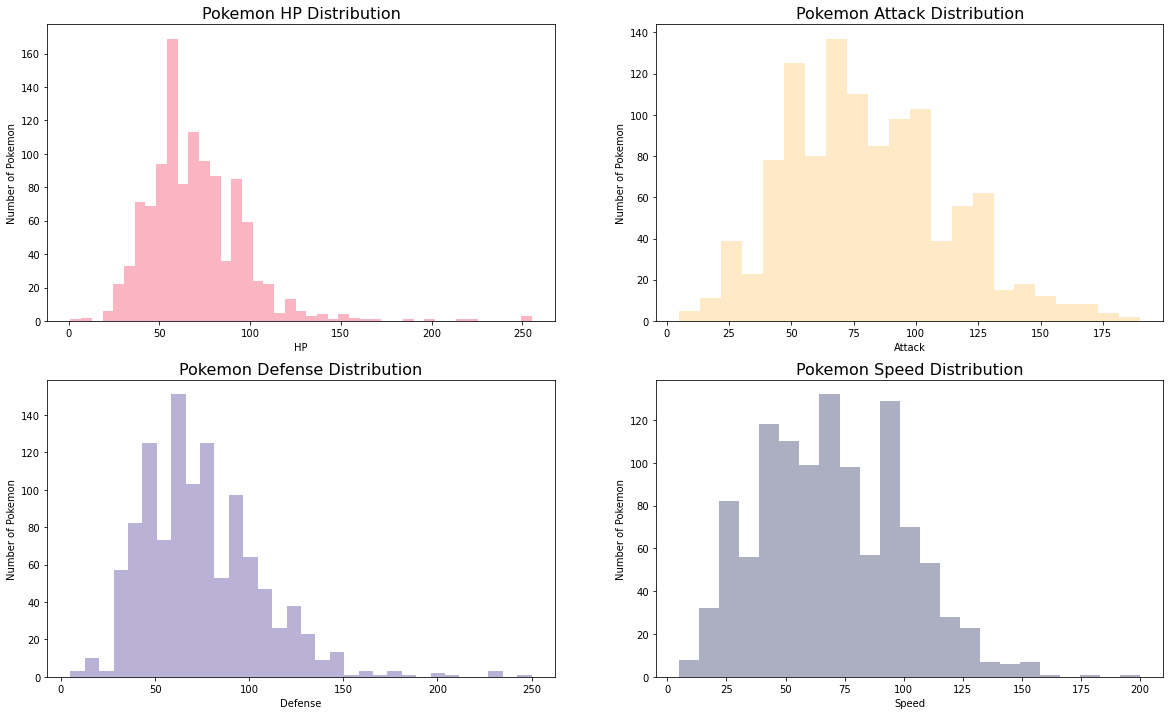

In [5]:
fig = plt.figure(figsize=(20, 12))

# Create Subplot for each Attribute
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Plot HP Attribute
sns.distplot(pokemon_data['hp'], color='#f64668', kde=False, ax=ax1)
ax1.set_title('Pokemon HP Distribution', fontsize=16)
ax1.set_xlabel('HP')
ax1.set_ylabel('Number of Pokemon')

# Plot Attack Attribue
sns.distplot(pokemon_data['attack'], color='#ffc872', kde=False, ax=ax2)
ax2.set_title('Pokemon Attack Distribution', fontsize=16)
ax2.set_xlabel('Attack')
ax2.set_ylabel('Number of Pokemon')

# Plot Attack Attribue
sns.distplot(pokemon_data['defense'], color='#50409a', kde=False, ax=ax3)
ax3.set_title('Pokemon Defense Distribution', fontsize=16)
ax3.set_xlabel('Defense')
ax3.set_ylabel('Number of Pokemon')

# Plot Attack Attribue
sns.distplot(pokemon_data['speed'], color='#313866', kde=False, ax=ax4)
ax4.set_title('Pokemon Speed Distribution', fontsize=16)
ax4.set_xlabel('Speed')
ax4.set_ylabel('Number of Pokemon')

<a id='4.2'></a>
## 4.2 KDE Plot
Using KDE to plot our Distribution of 4 Attributes: `Special Attack`, `Special Defense`, `Height` and `Weight`.

Text(0, 0.5, 'KDE')

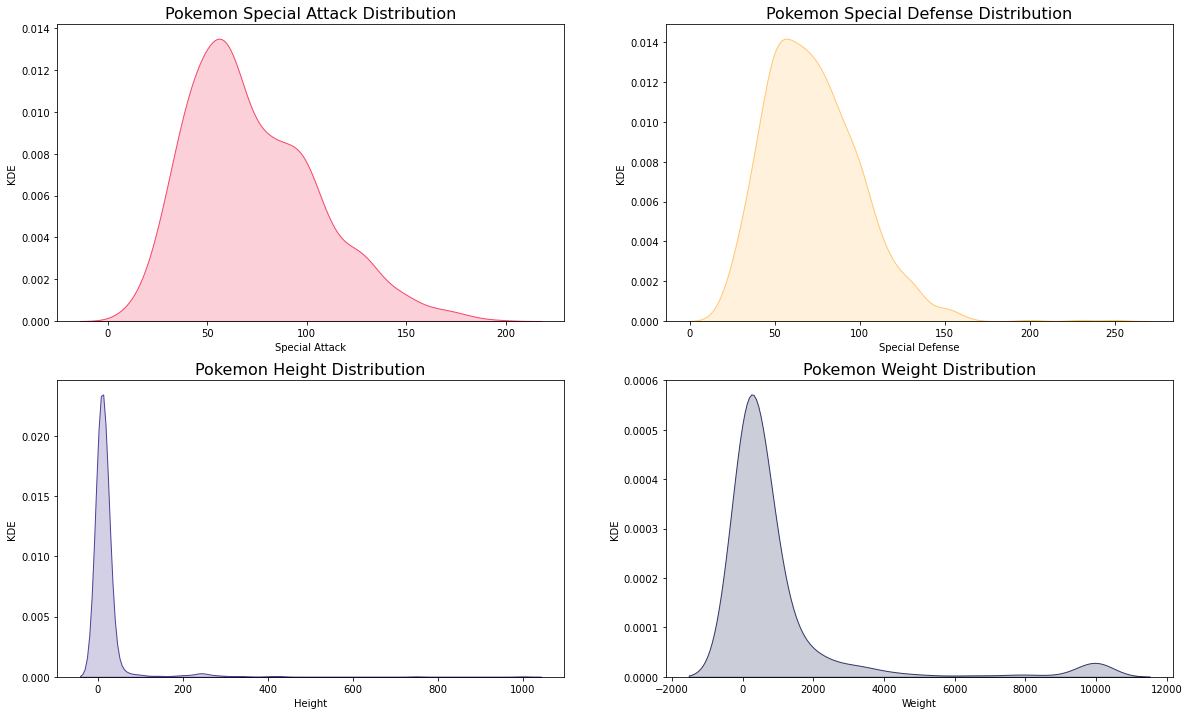

In [6]:
fig = plt.figure(figsize=(20, 12))

# Create Subplot for each Attribute
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Plot Special Attack Attribute
sns.kdeplot(pokemon_data['special_attack'], color='#f64668', shade=True, ax=ax1)
ax1.set_title('Pokemon Special Attack Distribution', fontsize=16)
ax1.set_xlabel('Special Attack')
ax1.set_ylabel('KDE')

# Plot Special Defense Attribue
sns.kdeplot(pokemon_data['special_defense'], color='#ffc872',  shade=True, ax=ax2)
ax2.set_title('Pokemon Special Defense Distribution', fontsize=16)
ax2.set_xlabel('Special Defense')
ax2.set_ylabel('KDE')

# Plot Height Attribue
sns.kdeplot(pokemon_data['height'], color='#50409a', shade=True, ax=ax3)
ax3.set_title('Pokemon Height Distribution', fontsize=16)
ax3.set_xlabel('Height')
ax3.set_ylabel('KDE')

# Plot Weight Attribue
sns.kdeplot(pokemon_data['weight'], color='#313866', shade=True, ax=ax4)
ax4.set_title('Pokemon Weight Distribution', fontsize=16)
ax4.set_xlabel('Weight')
ax4.set_ylabel('KDE')

<a id='4.3'></a>
## 4.3 Bar Plot
In this section, we'll using `Bar Plot` to answer the question *`How many Pokemon was introduced in each Gen?`*

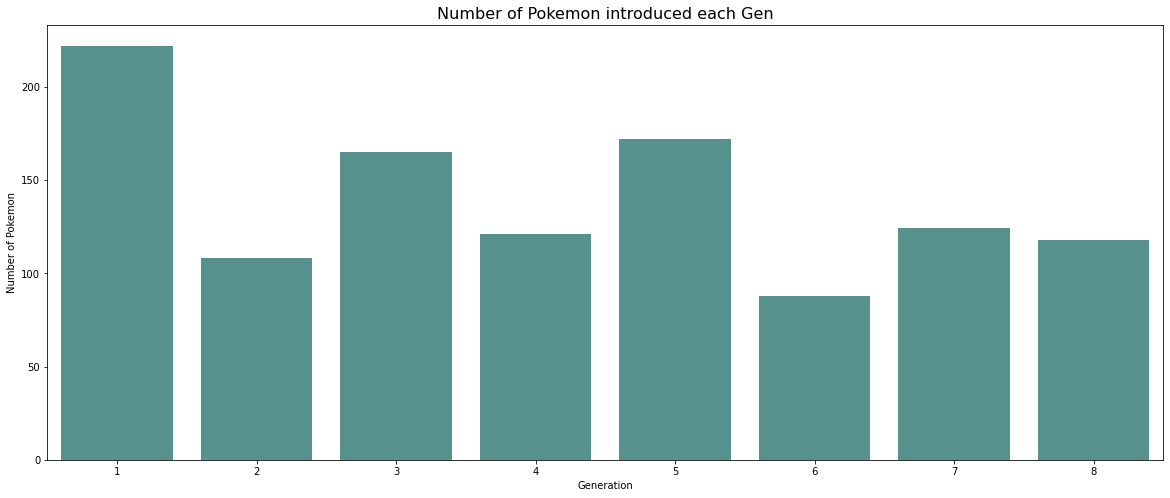

In [7]:
# Group Our data by 'gen_introduced' for plotting
gen_data = pokemon_data.groupby('gen_introduced').count()

# Plotting
plt.figure(figsize=(20, 8))

sns.barplot(x=gen_data.index, y=gen_data['pokedex_number'], saturation=.5, color='#39aea9')
plt.title('Number of Pokemon introduced each Gen', fontsize=16)
plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')

plt.savefig('PokePerGen_old.png', bbox_inches='tight')

<a id='4.4'></a>
## 4.4 Advanced Visualization
In this Section, I try my best to plot the previous [Bar plot](#4.3) in an advanced way:
- Adjust many plot components like `spines` (line around the plot), `ticks`, `grid`.
- Add (beautiful) `title` and its description, `xlabel` and `ylabel`
- Most importantly, add `bar label` by using `matplotlib.text`.

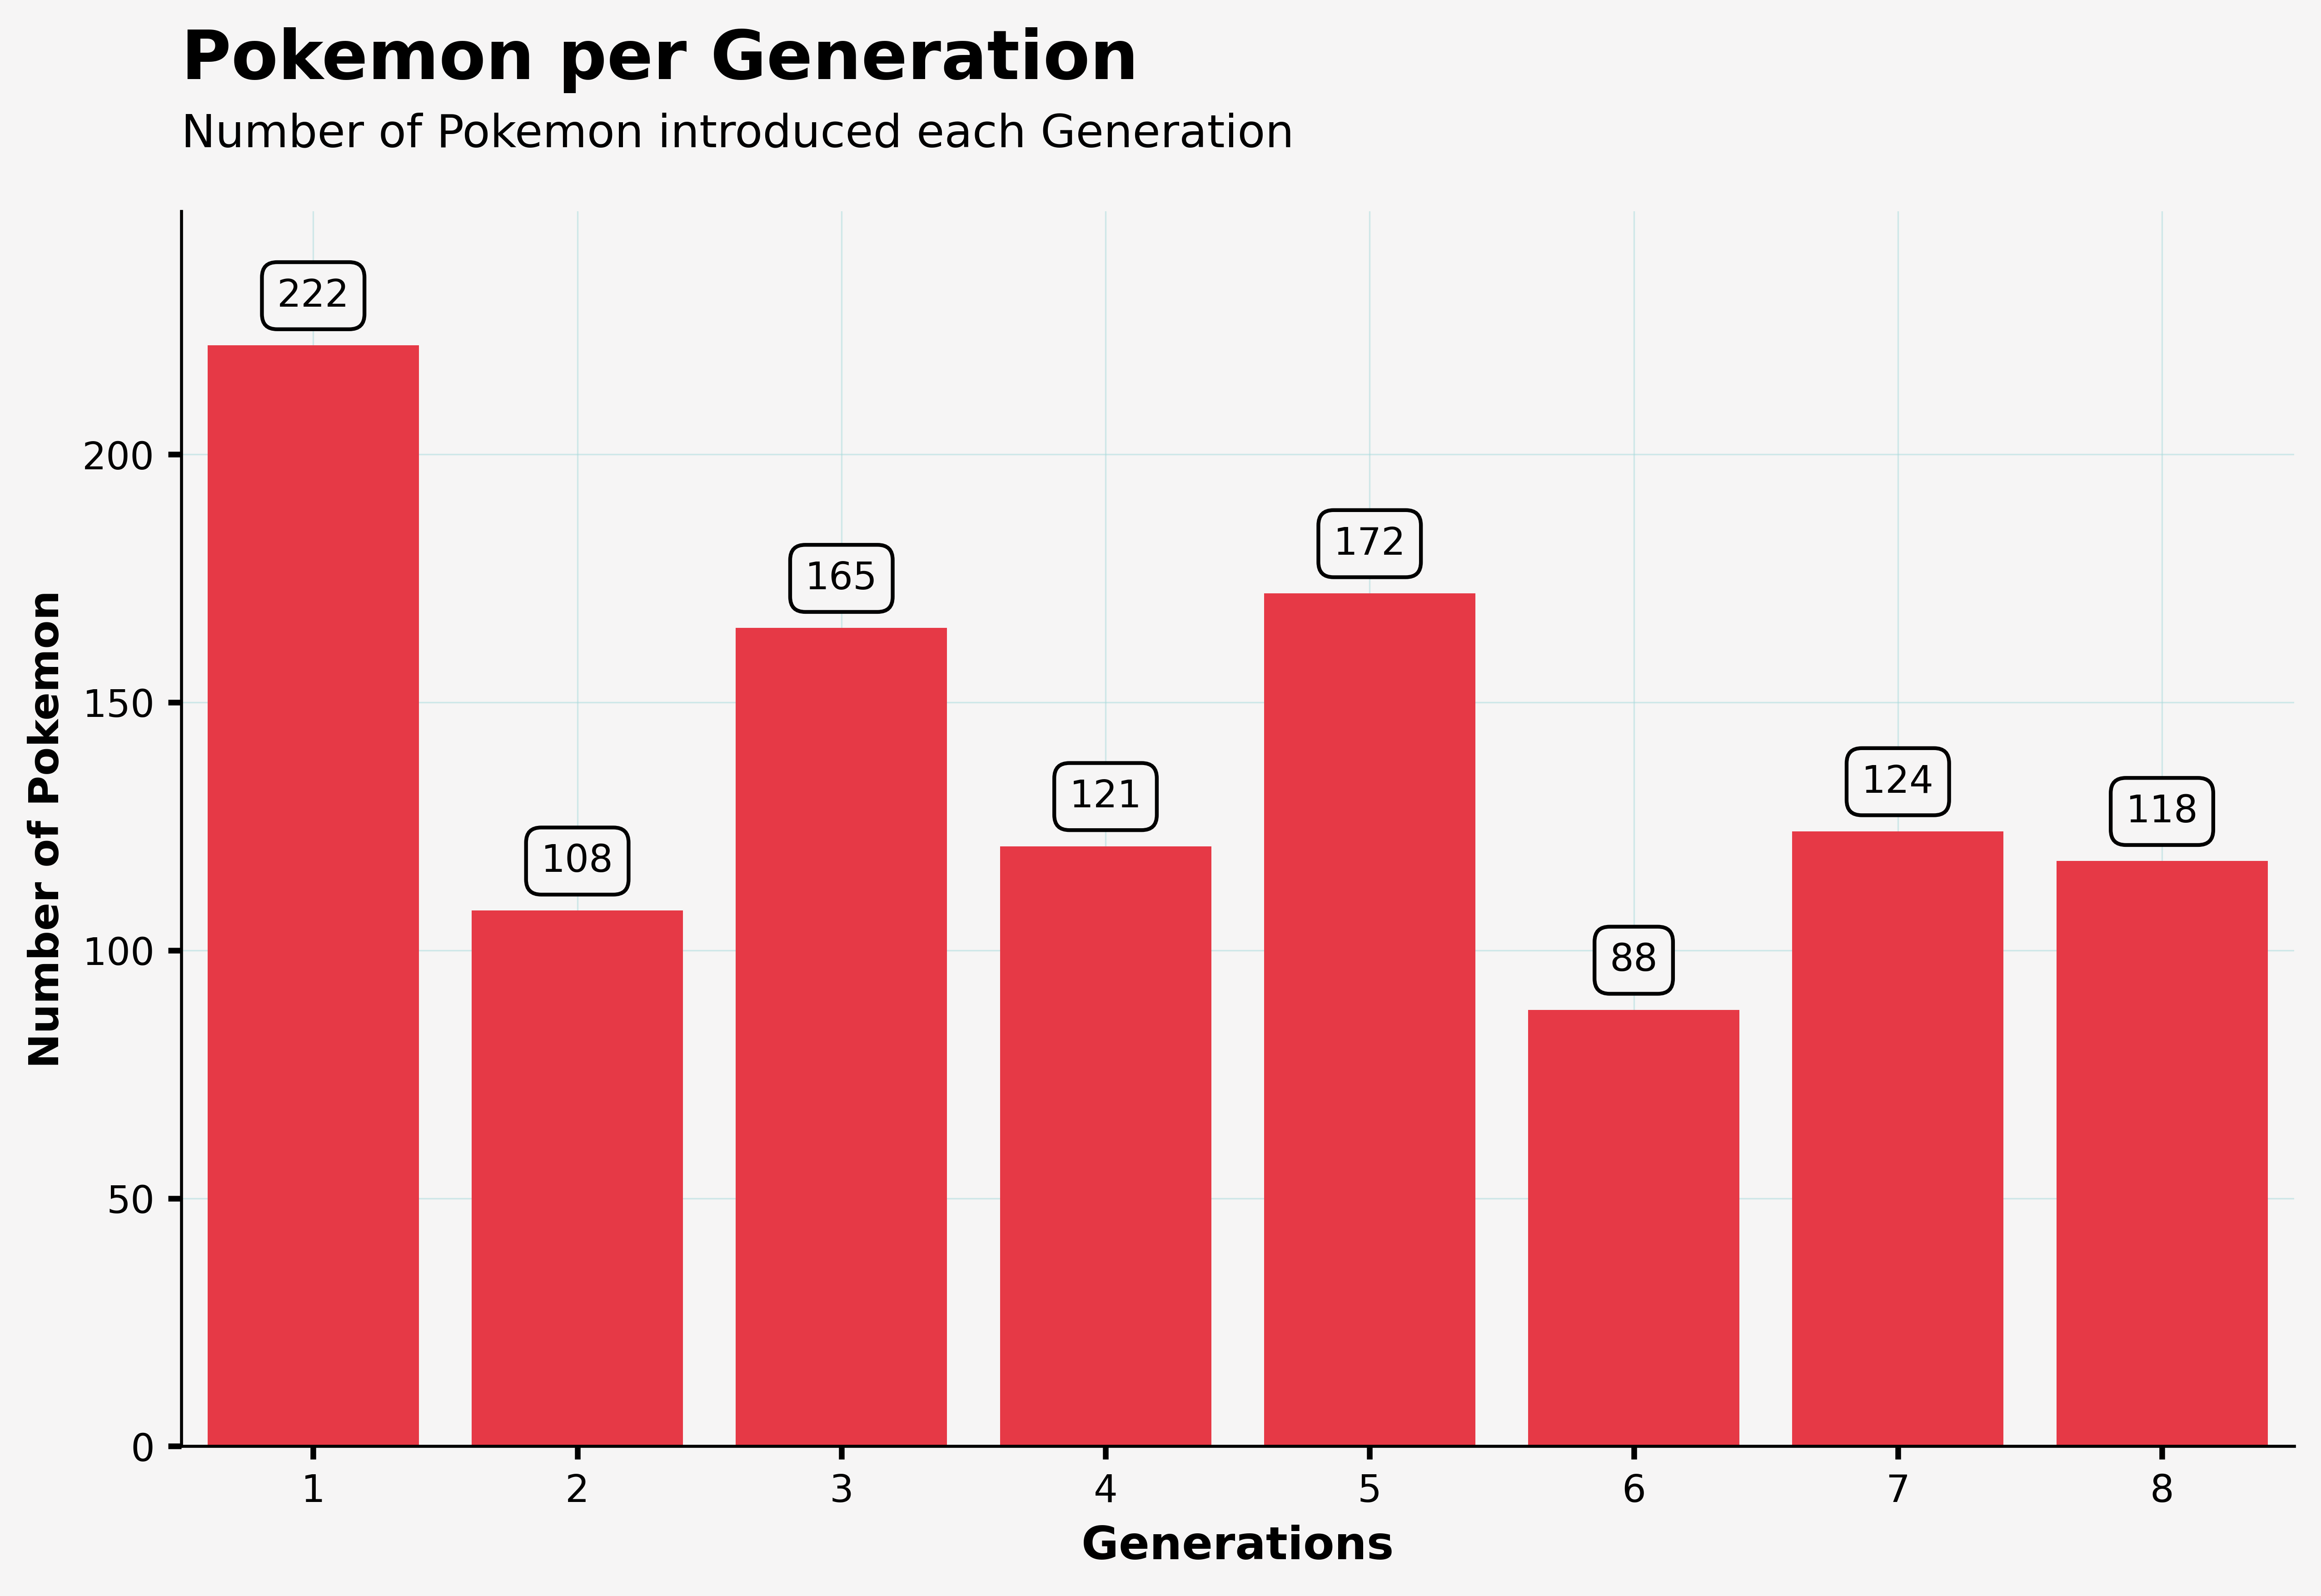

In [8]:
bg_color = '#f6f5f5'
accent_color = '#e63946'

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 6), facecolor=bg_color)
gs = fig.add_gridspec(1, 1)

# Initialize Plot
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(bg_color)
ax.spines[['top', 'right']].set_visible(False)

# Plot the Chart
sns.barplot(x=gen_data.index, y=gen_data['pokedex_number'], color=accent_color, saturation=1, zorder=2)
ax.set_xlabel('Generations', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Pokemon', fontsize=11, fontweight='bold')
ax.set_ylim(top=249)
ax.grid(which='major', axis='both', color='#a8dadc', alpha=0.5, linewidth=0.4, zorder=0)
ax.tick_params(labelsize=10, width=1.5)
ax.set_title('Pokemon per Generation', loc='left', fontsize=18, fontweight='bold', pad=35)
ax.text(-0.5, 262, "Number of Pokemon introduced each Generation", fontsize=12)

# Add text labels onto bars
for p in ax.patches:
    value = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.text(x, y, value, ha='center', va='center', bbox=dict(boxstyle='round', pad=0.4, facecolor=bg_color, ))
    
plt.savefig('PokePerGen_new.png', bbox_inches='tight')

<a id='5'></a>
# 5 Conclusion
- Most of our plotted attributes are roughly disttributed in a good shape (bell shape), which mean Nintendo did a good job on balance the game.
- We can see that `Height` and `Weight` attributes have some Outliers which are really far from the population. With some intuition, I guess they are legend Pokemons or somewhat like that.
- 1st Gen (undoubtedly) introduced the most Pokemon and the 3 nearest Gens, this number was decrease roughly by a half.

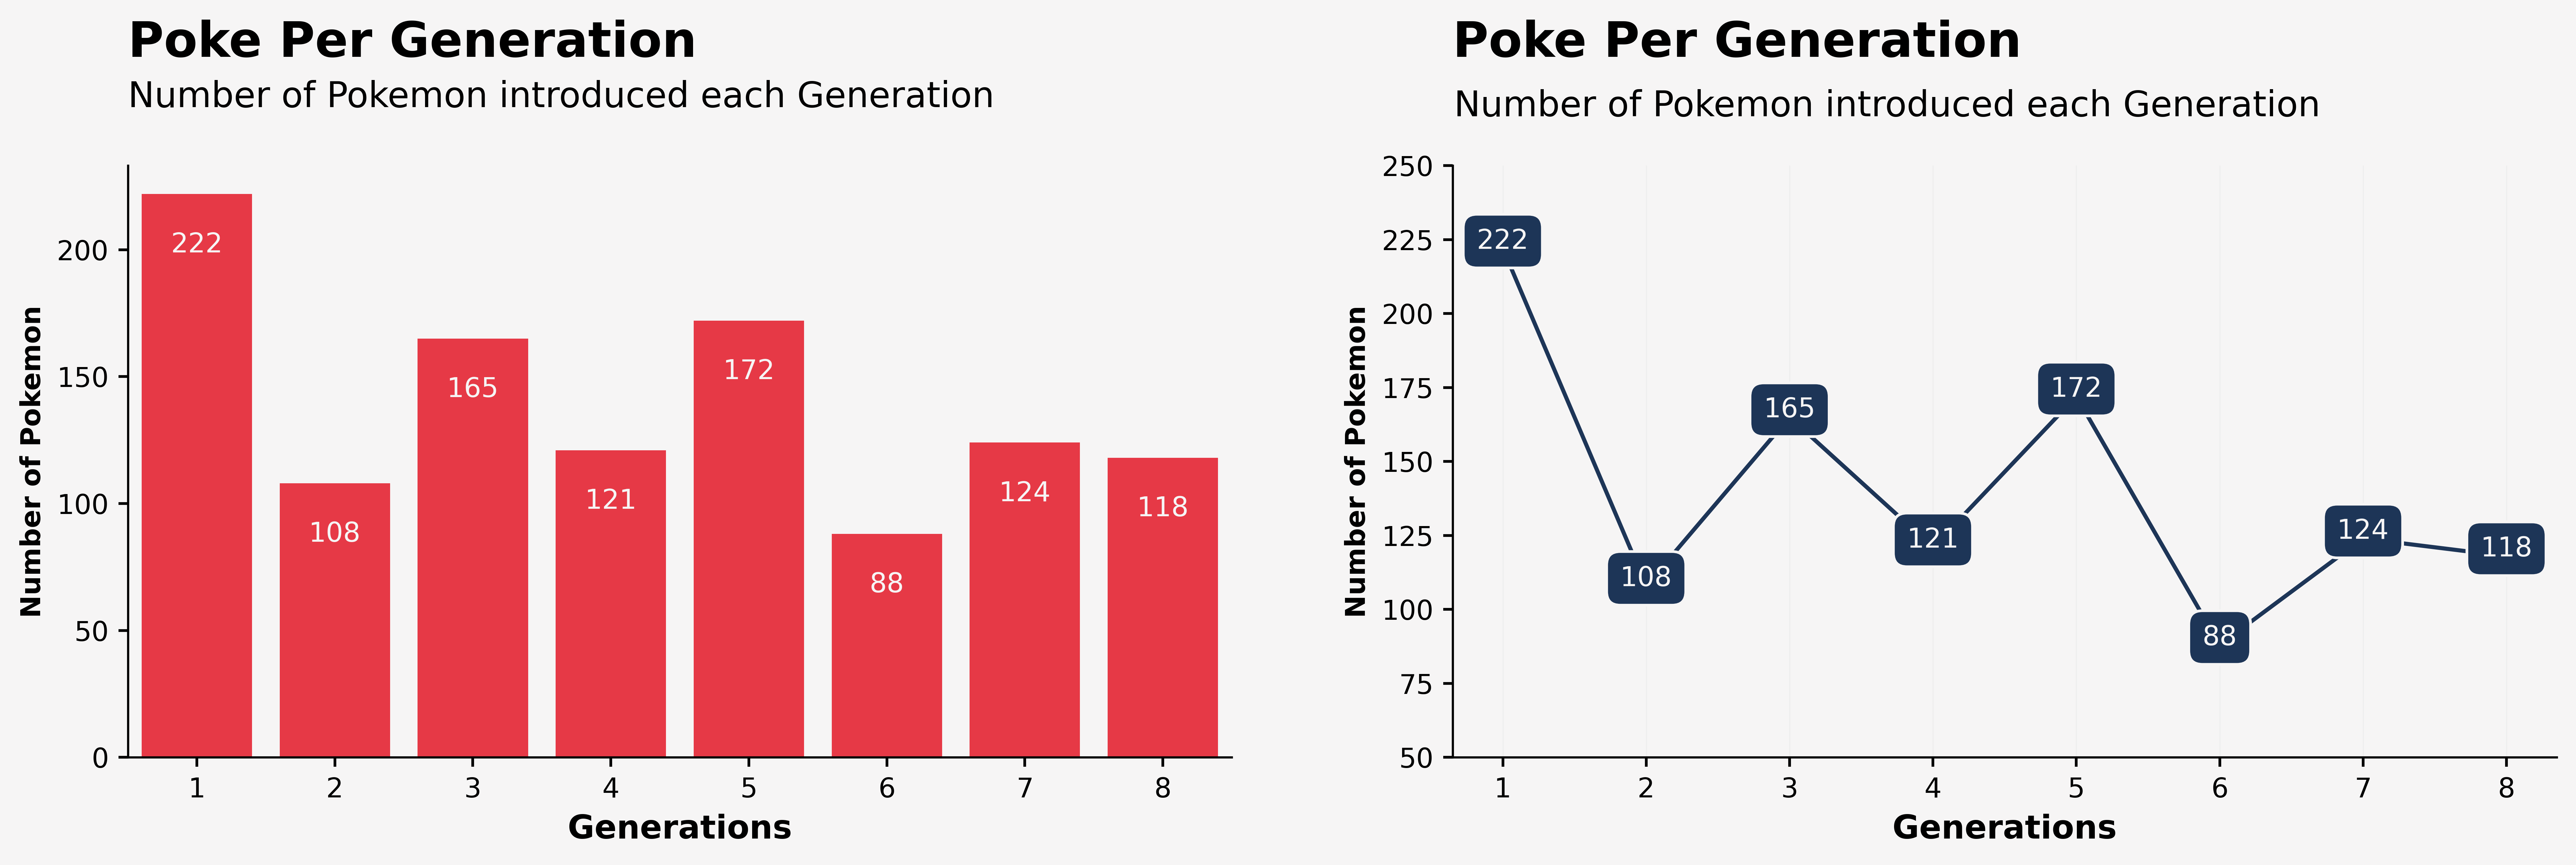

In [9]:
bg_color = '#f6f5f5'

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(16, 4), facecolor=bg_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.2, hspace=0.2)

# Create new axe (subplot)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(bg_color)
ax0.spines[['top', 'right']].set_visible(False)

# Plot first Chart
sns.barplot(ax=ax0, zorder=2, x=gen_data.index, y=gen_data['pokedex_number'], color='#e63946', saturation=1)
ax0.set_xlabel('Generations', fontsize=12, fontweight='bold')
ax0.set_ylabel('Number of Pokemon', fontsize=10, fontweight='bold')
ax0.tick_params(labelsize=10, width=1)
ax0.set_title("Poke Per Generation", loc='left', fontsize=18, fontweight='bold', pad=40)
ax0.text(-0.5, 260, "Number of Pokemon introduced each Generation", ha='left', va='center', fontsize=13, )

# Add Labels
for p in ax0.patches:
    value = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() - 20
    ax0.text(x, y, value, ha='center', va='center', color=bg_color)

# Create (another) new axe (subplot)
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_facecolor(bg_color)
ax1.spines[['top', 'right']].set_visible(False)

# Plot second Chart
sns.lineplot(ax=ax1, zorder=2, x=gen_data.index, y=gen_data['pokedex_number'], color='#1d3557', )
ax1.set_xlabel('Generations', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Pokemon', fontsize=10, fontweight='bold')
ax1.set_ylim([50, 250])
ax1.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.tick_params(labelsize=10, width=1)
ax1.set_title('Poke Per Generation', loc='left', fontsize=18, fontweight='bold', pad=40)
ax1.text(.66, 270, "Number of Pokemon introduced each Generation", ha='left', va='center', fontsize=13, )

# Add Labels
for p in gen_data.index:
    value = gen_data.loc[p, 'pokedex_number']
    x = p
    y = value + 2.5
    ax1.text(x, y, value, ha='center', va='center', color=bg_color, bbox=dict(boxstyle='round', pad=.5, facecolor='#1d3557', alpha=1, edgecolor=bg_color))

plt.show()